In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Arquivo criado para **teste** de códigos para realização de jogadas, caso tenha um bom resultado, será implementado nos algoritmos de IA para realizar os testes das jogadas

#### **Ajustes Dataset Original**

In [10]:
df = pd.read_csv('DatasetOriginal/tic-tac-toe.csv', sep=',')
#Inserção do nome das colunas
df.columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'Resultado']

#Normalização dos dados
df = df.replace('x', 1)
df = df.replace('o', -1)
df = df.replace('b', 0)
df = df.replace('positive', 1)
df = df.replace('negative', -1)

# Filtrando as linhas onde o Resultado é igual a 1
df_XVence = df[df['Resultado'] == 1]

#Armazenando os primeiros 400 resultados
df_XVence = df.head(400)

#Salvando o arquivo contendo os casos onde X Vence.
df_XVence.to_csv('PreProcessamentoDataset/XVenceu.csv', index=False)

#Invertendo os valores de X para O
df_OVence = df_XVence.copy()
df_OVence = df_OVence.replace(1, 2)
df_OVence = df_OVence.replace(-1, 1)
df_OVence = df_OVence.replace(2, -1)

#Salvando o arquivo contendo os casos onde O Vence.
df_OVence.to_csv('PreProcessamentoDataset/OVenceu.csv', index=False)

/tmp/ipykernel_1274/3344753422.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('b', 0)
/tmp/ipykernel_1274/3344753422.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('negative', -1)


#### **Criação de jogadas**

In [29]:
import itertools
import random

#Criação de empates
symbols = [1, -1]
all_boards = list(itertools.product(symbols, repeat=9))

draw_boards = []
for board in all_boards:
    ttt = np.array(board).reshape(3, 3)
    if status_jogo(ttt) == "EMPATE":
        board = board + (2,)
        draw_boards.append(board)

#Adicionando os rótulos das colunas
df_empate = pd.DataFrame(draw_boards, columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'Resultado'])

#Duplicando o número de empates para que tenhamos mais amostras
df_empate = pd.concat([df_empate]*2, ignore_index=True)

#Salvando o arquivo contendo os casos de empate.
df_empate.to_csv('PreProcessamentoDataset/Empate.csv', index=False)

#Criação de partidas que ainda estão em jogo
still_playing = set()
while len(still_playing) < 400:
    aX = random.randint(0, 4)
    aO = aX - 1 if aX > 0 else 0
    aB = 9 - (aX + aO)

    elements = [1] * aX + [-1] * aO + [0] * aB

    random.shuffle(elements)

    ttt = np.array(elements).reshape(3, 3)

    if status_jogo(ttt) == "AINDA TEM JOGO":
        elements.append(0)
        still_playing.add(tuple(elements))
        print(elements)

#Adicionando os rótulos das colunas
df_still_playing = pd.DataFrame(list(still_playing), columns=['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'Resultado'])

#Salvando o arquivo contendo os casos onde o jogo ainda não terminou.
df_still_playing.to_csv('PreProcessamentoDataset/TemJogo.csv', index=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, -1, 0, 0, 0, 0]
[1, 1, -1, -1, -1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[-1, 0, -1, 1, 0, 1, -1, 1, 1, 0]
[0, 0, -1, 0, 1, 0, 0, 1, 0, 0]
[-1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 0, -1, 0, 0, 0]
[-1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1, 0, 0, 1, 1, -1, -1, 1, 1, 0]
[0, 0, -1, 0, 1, 0, 1, 1, -1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, -1, 1, 0, -1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, -1, -1, -1, 0, 1, 0, 1, 1, 0]
[1, 1, -1, 1, 0, 1, 0, -1, -1, 0]
[0, 0, 0, 1, 1, -1, -1, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, -1, 0, -1, 1, 0, 1, 0, 0]
[0, 1, -1, 1, -1, -1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, -1, 1, 0, 0, -1, 0]
[0, 0, 0, -1, 0, 1, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 1, -1, 0, -1, 0]
[0, -1, 0, 1, -1, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 0, -1, -1, 0]
[0, 0, -1, 1, 0, 0, 0, 1, 0, 0

#### **Segregação Datasets Treino, Validação e Teste**

In [14]:
df_XVence = pd.read_csv('PreProcessamentoDataset/XVenceu.csv')
df_OVence = pd.read_csv('PreProcessamentoDataset/OVenceu.csv')
df_empate = pd.read_csv('PreProcessamentoDataset/Empate.csv')
df_temJogo = pd.read_csv('PreProcessamentoDataset/TemJogo.csv')


#Gerando Dataset de Validação, Teste e Treino

#Dividindo os dados em 80% para treino e 20% para validação e teste
validacao_XVence = df_XVence.sample(frac=0.2, random_state=42)
df_XVence = df_XVence.drop(validacao_XVence.index)
#Dividindo os dados de validação em 50% para teste e 50% para validação
teste_XVence = validacao_XVence.sample(frac=0.5, random_state=42)
validacao_XVence = validacao_XVence.drop(teste_XVence.index)

validacao_OVence = df_OVence.sample(frac=0.2, random_state=42)
df_OVence = df_OVence.drop(validacao_OVence.index)
teste_OVence = validacao_OVence.sample(frac=0.5, random_state=42)
validacao_OVence = validacao_OVence.drop(teste_OVence.index)

validacao_empate = df_empate.sample(frac=0.2, random_state=42)
df_empate = df_empate.drop(validacao_empate.index)
teste_empate = validacao_empate.sample(frac=0.5, random_state=42)
validacao_empate = validacao_empate.drop(teste_empate.index)

validacao_temJogo = df_temJogo.sample(frac=0.2, random_state=42)
df_temJogo = df_temJogo.drop(validacao_temJogo.index)
teste_temJogo = validacao_temJogo.sample(frac=0.5, random_state=42)
validacao_temJogo = validacao_temJogo.drop(teste_temJogo.index)


df = pd.concat([df_XVence, df_OVence, df_empate, df_temJogo], ignore_index=True)
df_teste = pd.concat([teste_XVence, teste_OVence, teste_empate, teste_temJogo], ignore_index=True)
df_validacao = pd.concat([validacao_XVence, validacao_OVence, validacao_empate, validacao_temJogo], ignore_index=True)

print(len(df), len(df_teste), len(df_validacao))

df.to_csv('Treino.csv', index=False)
df_teste.to_csv('Teste.csv', index=False)
df_validacao.to_csv('Validacao.csv', index=False)

validacao_XVence.to_csv('Validacao/texte_vencedor_x.csv', index=False)
validacao_OVence.to_csv('Validacao/texte_vencedor_o.csv', index=False)
validacao_empate.to_csv('Validacao/texte_empate.csv', index=False)
validacao_temJogo.to_csv('Validacao/texte_tem_jogo.csv', index=False)

teste_XVence.to_csv('Teste/teste_vencedor_x.csv', index=False)
teste_OVence.to_csv('Teste/teste_vencedor_o.csv', index=False)
teste_empate.to_csv('Teste/teste_empate.csv', index=False)
teste_temJogo.to_csv('Teste/teste_tem_jogo.csv', index=False)

df_XVence = pd.read_csv('Treino/treino_vencedor_x.csv')
df_OVence = pd.read_csv('Treino/treino_vencedor_o.csv')
df_empate = pd.read_csv('Treino/treino_empate.csv')
df_temJogo = pd.read_csv('Treino/treino_tem_jogo.csv')



1011 126 127


#### **Funções**

##### **Funções para classificação de jogadas**

In [12]:
# Função para verificar se as linhas são iguais
def verif_linhas(array):
    for linha in array:
        # Verificando se os elementos da linha são iguais exceto zero
        if (np.all(linha == 1) or np.all(linha == -1)) and np.any(linha != 0): 
           return str(linha[0]) # Retornando o valor do ganhador: 1 ou -1
       
    return False

# Função para verificar se as colunas são iguais          
def verif_colunas(array):
    # Transpondo o array para verificar colunas como se fossem linhas
    for coluna in array.T:  
        # Verificando se os elementos da coluna são iguais exceto zero
        if (np.all(coluna == 1) or np.all(coluna == -1)) and np.any(coluna != 0): 
            return str(coluna[0]) # Retornando o valor do ganhador: 1 ou -1
        
    return False

# Função para verificar se a diagonal principal são iguais
def verif_diag_principal(array):
    diagonal_principal = np.diag(array)  # Diagonal principal
    # Verificando se os elementos da diagonal principal são iguais exceto zero
    if (np.all(diagonal_principal == 1) or np.all(diagonal_principal == -1))  and np.all(diagonal_principal!=0) :
        return str(diagonal_principal[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

# Função para verificar se a diagonal secundária são iguais
def verif_diag_secundaria(array):
    diagonal_secundaria = np.diag(np.fliplr(array))  # Diagonal secundária (flipping array)
    # Verificando se os elementos da diagonal secundária são iguais exceto zero
    if (np.all(diagonal_secundaria == 1) or np.all(diagonal_secundaria==-1))  and np.all(diagonal_secundaria!=0): 
        return str(diagonal_secundaria[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    # Conversão do array que está sendo usado como parâmetro em uma matriz de 3x3
    jogada = np.array(jogada).reshape(3,3)
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

In [9]:
def get_tabuleiro(jogadas):
    # Função para imprimir o tabuleiro de Tic-Tac-Toe
    for i in range(0, 9, 3):
        linha = jogadas[i:i+3]
        print(' | '.join(linha))
        if i < 6:
            print("---------")  # Separador entre linhas

##### **Funções para plotagem do tabuleiro**

In [11]:
import matplotlib.pyplot as plt

def plot_board(board):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    status = status_jogo(board)
    plt.text(1.5, -0.5, 'Status: ' + status, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


Tabuleiro 1:


IndexError: list index out of range

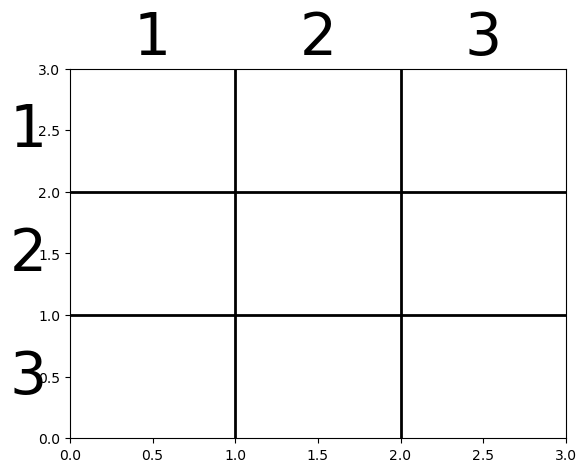

##### **Funções para realização de jogadas**

In [18]:
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)


def ajuste_jogada(jogada,linha,coluna):
    # Subtraindo os valores das linhas ou colunas caso o valor seja maior que zero
    if linha != 0:
        linha -= 1

    if coluna != 0:
        coluna -= 1
        
    # print("Linha: {} Coluna: {}".format(linha,coluna))

    # Caso a posição informada pelo usuário não esteja preenchida, ele realiza a modificação
    if jogada[linha][coluna] != 0:
        print ("Já preenchido")
    else:
        jogada[linha][coluna] = 1
        print ("Jogada realizada")
        
    return jogada

In [10]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Realizando o ajuste da jogada a partir das posições de inserção informadas
    jogada = ajuste_jogada(jogada,linha,coluna)
    
    # Plotando o tabuleiro 
    # AQUI PRECISA DA FUNÇÃO BONITA PARA EXIBIR O TABULEIRO COM OS X E O

    plot_board(jogada)
    
    
    # Obtenção do status do jogo
    print(status_jogo(jogada))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True

NameError: name 'plot_board' is not defined